In [27]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [28]:
samples=np.array([[1,2],[12,2],[0,1],[10,0],[9,1],[8,2],[0,10],[1,8],[2,9],[9,9],[10,8],[8,9] ], dtype=np.float64)
centers=np.array([[3,2], [2,6], [9,3], [7,6]], dtype=np.float64)

N = len(samples)

[]

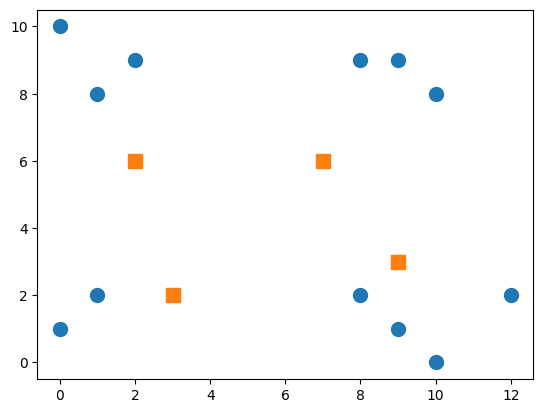

In [29]:
fig, ax = plt.subplots()
ax.scatter(samples.transpose()[0], samples.transpose()[1], marker = 'o', s = 100)
ax.scatter(centers.transpose()[0], centers.transpose()[1], marker = 's', s = 100)

plt.plot()

In [30]:
#Return distance of a sample to all centroids and recalculate distance
def distance(sample, centroids):
    distances = np.zeros(len(centroids))
    for i in range (0, len(centroids)):
        dist = np.sqrt(sum(pow(np.subtract(sample, centroids[i]), 2)))
        distances[i] = dist
    return distances

In [45]:
def showcurrentstatus(samples, centers, clusters, plotnumber):
    plt.subplot(620 + plotnumber)
    plt.scatter(samples.transpose()[0], samples.transpose()[1], marker = 'o', s = '100', c = clusters)
    plt.scatter(centers.transpose()[0], centers.transpose()[1], marker = 's', s = '100', color = 'black')
    plt.plot()

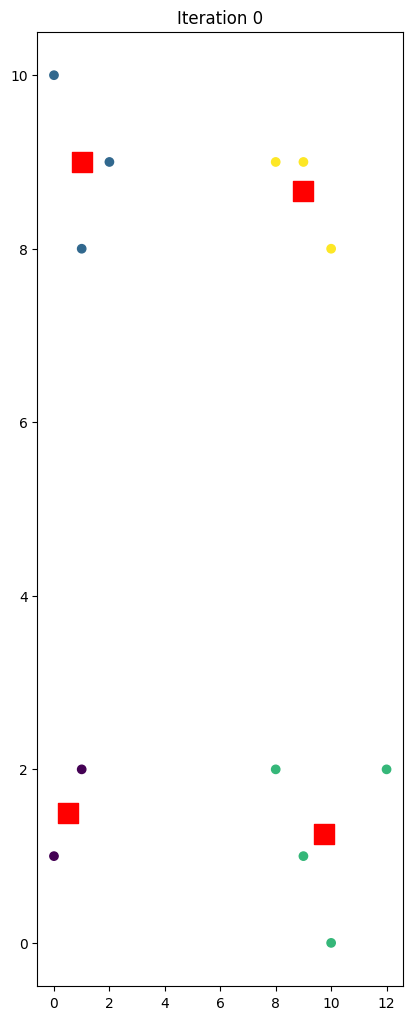

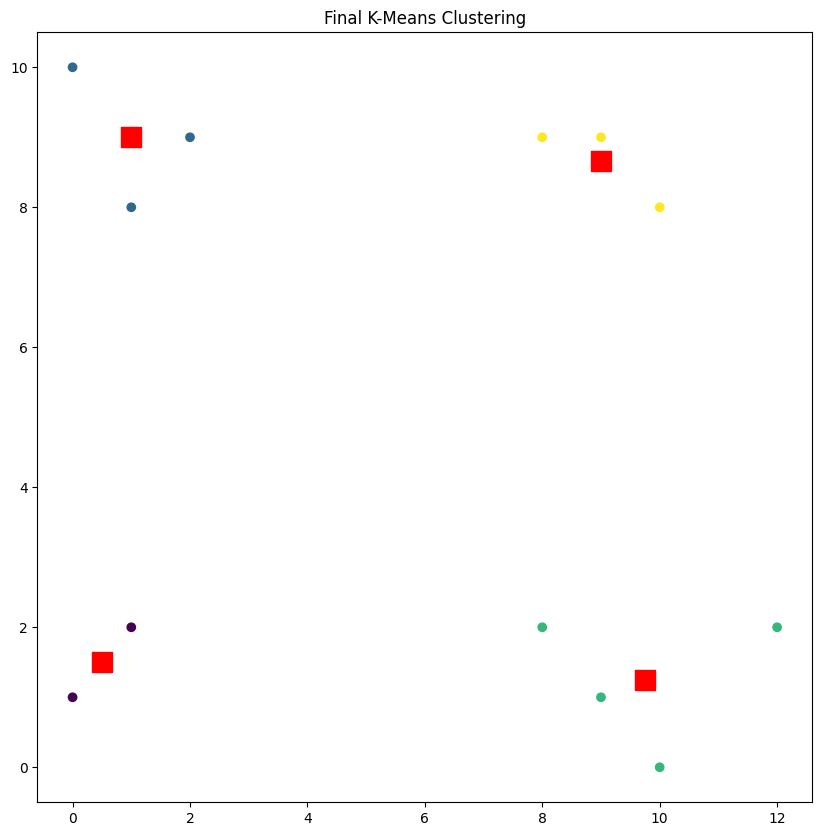

In [48]:
def kmeans(centroids, samples, K, max_iterations=100, tolerance=1e-4):
    plt.figure(figsize=(20,20))
    
    for iteration in range(max_iterations):
        # Assign samples to nearest centroid
        distances = np.array([distance(sample, centroids) for sample in samples])
        clusters = np.argmin(distances, axis=1)
        
        # Compute new centroids
        new_centroids = np.array([samples[clusters == k].mean(axis=0) for k in range(K)])
        
        # Check for convergence
        if np.all(np.abs(new_centroids - centroids) < tolerance):
            break
        
        centroids = new_centroids
        
        # Visualize every 10 iterations
        if iteration % 10 == 0:
            plt.subplot(2, 5, iteration // 10 + 1)
            plt.scatter(samples[:, 0], samples[:, 1], c=clusters, cmap='viridis')
            plt.scatter(centroids[:, 0], centroids[:, 1], marker='s', s=200, c='red')
            plt.title(f'Iteration {iteration}')
    
    plt.tight_layout()
    plt.show()
    
    return centroids, clusters

final_centers, final_clusters = kmeans(centers, samples, 4)


plt.figure(figsize=(10,10))
plt.scatter(samples[:, 0], samples[:, 1], c=final_clusters, cmap='viridis')
plt.scatter(final_centers[:, 0], final_centers[:, 1], marker='s', s=200, c='red')
plt.title('Final K-Means Clustering')
plt.show()